# Notes about the SAS's Course
## Statistics 1: Introduction to ANOVA, Regression, and Logistic Regression

This notes is based in the course materials. I made a Jupyter Notebook using JupiterLab with SAS University Edition. 

## 0. Script to setup the sesion
Run this script in the begining the each session to access the data in the correct way. 

In [ ]:
%let homefolder=/folders/myfolders/ECST142;

libname STAT1 "&homefolder";

options fmtsearch=(stat1.myfmts);

proc format library=stat1.myfmts;
run;

/* create macro variables to hold the names of the interval and */
/* categorical variables used in the demo and practice programs */

%let interval=Gr_Liv_Area Basement_Area Garage_Area Deck_Porch_Area 
         Lot_Area Age_Sold Bedroom_AbvGr Total_Bathroom;

%let categorical=House_Style2 Overall_Qual2 Overall_Cond2 Fireplaces 
         Season_Sold Garage_Type_2 Foundation_2 Heating_QC 
         Masonry_Veneer Lot_Shape_2 Central_Air;

## 2. ANOVA and Regression

When we are studying the relation between variables, the first step is to detect potential predictors. After getting the predictors, we use tools like ANOVA and Regression to assess the quality of the relation between the predictors and the response.

### Graphical Analysis of Associations
To do a graphical exploration about the relations between variables in the data we can use boxplots and scatterplot.

First, let's examine the data file. 

In [24]:
proc print data=stat1.ameshousing3 (obs=5); 
run;

Obs,PID,Lot_Area,House_Style,Overall_Qual,Overall_Cond,Year_Built,Heating_QC,Central_Air,Gr_Liv_Area,Bedroom_AbvGr,Fireplaces,Garage_Area,Mo_Sold,Yr_Sold,SalePrice,Basement_Area,Full_Bathroom,Half_Bathroom,Total_Bathroom,Deck_Porch_Area,Age_Sold,Season_Sold,Garage_Type_2,Foundation_2,Masonry_Veneer,Lot_Shape_2,House_Style2,Overall_Qual2,Overall_Cond2,Log_Price,Bonus,score
1,0527127150,4920,1Story,8,5,2001,Ex,Y,1338,2,0,582,4,2010,213500,1338,3,0,3,0,9,2,Attached,Concrete/Slab,N,Regular,1Story,6,5,12.271392112,1,.
2,0527145080,5005,1Story,8,5,1992,Ex,Y,1280,2,0,506,1,2010,191500,1280,2,0,2,226,18,1,Attached,Concrete/Slab,N,Irregular,1Story,6,5,12.162643088,1,.
3,0527425090,10500,1Story,4,5,1971,TA,Y,864,3,1,0,4,2010,115000,864,1,0,1,0,39,2,NA,Cinder Block,N,Regular,1Story,4,5,11.652687407,0,.
4,0528228285,3203,1Story,7,5,2006,Ex,Y,1145,2,0,437,1,2010,160000,1145,2,0,2,216,4,1,Attached,Concrete/Slab,Y,Regular,1Story,6,5,11.982929094,0,.
5,0528250100,7750,SLvl,7,5,2000,Ex,Y,1430,3,1,400,4,2010,180000,384,2,1,2.1,180,10,2,Attached,Concrete/Slab,N,Irregular,SLvl,6,5,12.10071213,1,.


In [16]:
proc contents data=stat1.ameshousing3 varnum; 
run;

### Demo: Exploring Associations Using PROC SGPLOT

In this case we are goint to check viusally if there is an association between the *air conditioning* (categorical) variable with the *sales price* (continuous) variable, using a boxplot.

We submit this code: 

/*st102d01.sas*/  /*Part C*/

`proc sgplot data=STAT1.ameshousing3;
    vbox SalePrice / category=Central_Air connect=mean;                     
    title "Sale Price Differences across Central Air";
run;`


![title](img/stat1.2.1.png)


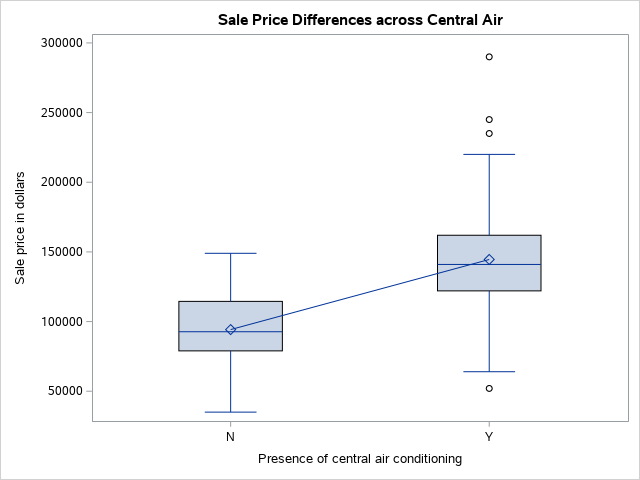

In [22]:
proc sgplot data=STAT1.ameshousing3;
    vbox SalePrice / category=Central_Air connect=mean;                     
    title "Sale Price Differences across Central Air";
run;

The central line is not horizontal, It suggest a relation between the variables. In other words, homes with central air tents to get higher prices. If the model include multiple variables the relations could change.
It represents simple relations. If we add multiples variables in the model the relations could be different. 

### Identifying Associations in Linear Regression with Scatter Plots

Scatter plots are two-dimensional graphs about two continuous variables, describe the relationship between the two variables.
Other uses about this plot:detect outliers, identify trends in your data, identify the range of X and Y values, and communicate the results of a data analysis. 

### Demo: Exploring Associations Using PROC SGSCATTER

The goal is take a general idea about the asociation between sales price (response variable) and the others variables (predictors), and the shape about that association. 

/*st102d01.sas*/  /*Part A*/
`proc sgscatter data=STAT1.ameshousing3;
    plot SalePrice*Gr_Liv_Area / reg;
    title "Associations of Above Grade Living Area with Sale Price";
run;`



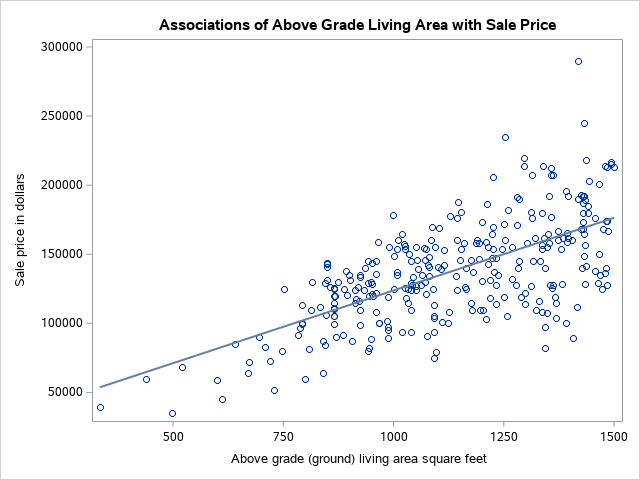

In [25]:
/*st102d01.sas*/  /*Part A*/
proc sgscatter data=STAT1.ameshousing3;
    plot SalePrice*Gr_Liv_Area / reg;
    title "Associations of Above Grade Living Area with Sale Price";
run;

the form of the plot suggest a lineal asociation between both variables, it suggest the there are more dispersion when the above ground is bigger.

Now lets make a panel of scatter

`/*PROC SGSCATTER is used to explore relationships among continuous variables*/
/*using scatter plots*/
options nolabel;
proc sgscatter data=STAT1.ameshousing3;
    plot SalePrice*(&interval) / reg;
    title "Associations of Interval Variables with Sale Price";
run;`



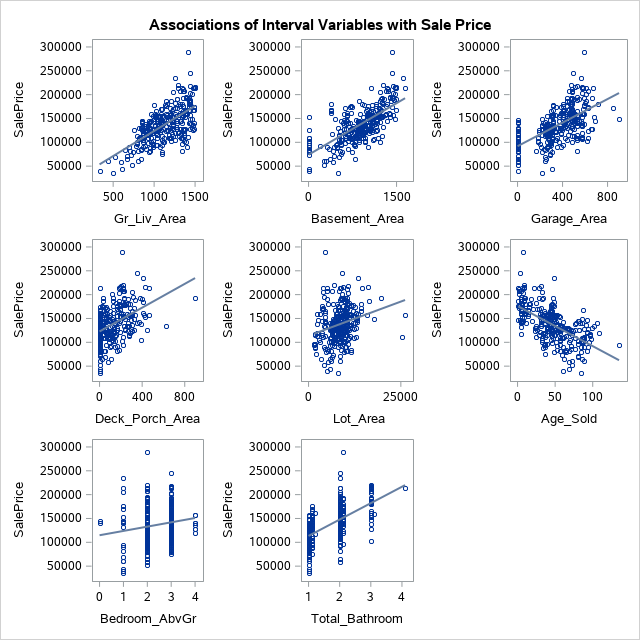

In [7]:
/*st102d01.sas*/  /*Part B*/
/*PROC SGSCATTER is used to explore relationships among continuous variables*/
/*using scatter plots*/
options nolabel;
proc sgscatter data=STAT1.ameshousing3;
    plot SalePrice*(&interval) / reg;
    title "Associations of Interval Variables with Sale Price";
run;

### One-Way ANOVA

#### The ANOVA Hypothesis
With ANOVA, the null hypothesis is that the population means are equal.

#### Partitioning Variability in ANOVA
In ANOVA, the goal is to determine whether there are significant differences among the group means.Total Variation in the response variable (as measured by the corrected total sum of squares) into two components, the Between Group Variation (displayed in the ANOVA table as the Model Sum of Squares) and the Within Group Variation (displayed as the Error Sum of Squares).

#### F Statistic and Critical Values
We have to create our Analysis of Variance Table.
The degrees of freedom (DF) represent the number of independent pieces of information that go into each calculation.

#### The ANOVA Model
This mathematical model is a way to represent the relationship between the response and predictor variables in ANOVA.
the validity of the p-value depends on the data meeting the assumptions for ANOVA:
The first assumption is one of independent observations.
The second assumption is that the error terms are normally distributed for every group or treatment.
The third assumption is that the error terms have equal variances across treatments.